# Analysis around Major vs Minor vs Patch vs Pinned

In [8]:
PROJECT_ROOT = '..'
CSV_FOLDER = 'csv'

%run _utils.ipynb

issues = load_issues()
package_names = load_package_names()
library_versions = load_library_versions()


/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14,16,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# How many of each type are there issue reports for?

In [9]:
# Breaking issues from Greenkeeper reports
issues_with_update_type_count = len(issues[~(issues['update_type'].isnull())])
percent_with_update_type = calculate_percent(issues_with_update_type_count, len(issues))

major_break_count = len(issues[issues['update_type'] == MAJOR])
minor_break_count = len(issues[issues['update_type'] == MINOR])
patch_break_count = len(issues[issues['update_type'] == PATCH])

major_break_percent = calculate_percent(major_break_count, issues_with_update_type_count)
minor_break_percent = calculate_percent(minor_break_count, issues_with_update_type_count)
patch_break_percent = calculate_percent(patch_break_count, issues_with_update_type_count)

print(f"{percent_with_update_type}% ({issues_with_update_type_count}) of Greenkeeper issues could have their update type extracted.")
print(f"\t{major_break_percent}% ({major_break_count}) are major breaking updates")
print(f"\t{minor_break_percent}% ({minor_break_count}) are minor breaking updates")
print(f"\t{patch_break_percent}% ({patch_break_count}) are patch breaking updates")

64.04% (78900) of Greenkeeper issues could have their update type extracted.
	0.15% (122) are major breaking updates
	34.56% (27264) are minor breaking updates
	65.29% (51514) are patch breaking updates


# What types of updates do packages release most often?

In [10]:
# Releases of all packages from libraries.io
all_library_updates_count = len(library_versions[~(library_versions['version_release_type'].isnull())])
major_all_library_updates_count = len(library_versions[library_versions['version_release_type'] == MAJOR])
minor_all_library_updates_count = len(library_versions[library_versions['version_release_type'] == MINOR])
patch_all_library_updates_count = len(library_versions[library_versions['version_release_type'] == PATCH])

major_all_library_percent = calculate_percent(major_all_library_updates_count, all_library_updates_count)
minor_all_library_percent = calculate_percent(minor_all_library_updates_count, all_library_updates_count)
patch_all_library_percent = calculate_percent(patch_all_library_updates_count, all_library_updates_count)

print(f"{all_library_updates_count} releases could have an explicit release type assigned")
print(f"\t{major_all_library_percent}% ({major_all_library_updates_count}) are major updates")
print(f"\t{minor_all_library_percent}% ({minor_all_library_updates_count}) are minor updates")
print(f"\t{patch_all_library_percent}% ({patch_all_library_updates_count}) are patch updates")

453942 releases could have an explicit release type assigned
	8.34% (37845) are major updates
	23.37% (106107) are minor updates
	68.29% (309990) are patch updates


# Breakages, Releases, and Breakages/Releases

<ipython-input-11-0dac322a52a6>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_yticklabels(y_labels)


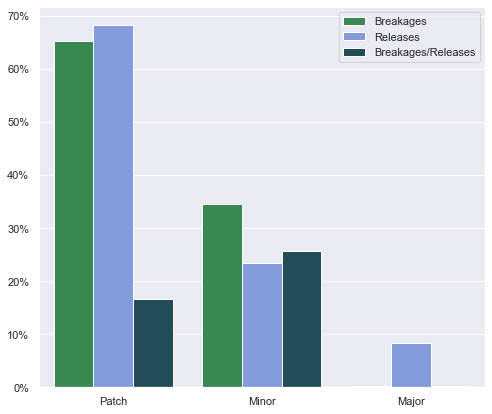

In [11]:
value_type = ['Breakages', 'Breakages', 'Breakages', 'Releases', 'Releases', 'Releases', 'Breakages/Releases', 'Breakages/Releases', 'Breakages/Releases']
update_types = ['Patch', 'Minor', 'Major', 'Patch', 'Minor', 'Major', 'Patch', 'Minor', 'Major']
value = [
    patch_break_count/issues_with_update_type_count,
    minor_break_count/issues_with_update_type_count,
    major_break_count/issues_with_update_type_count,
    patch_all_library_updates_count/all_library_updates_count,
    minor_all_library_updates_count/all_library_updates_count,
    major_all_library_updates_count/all_library_updates_count,
    patch_break_count/patch_all_library_updates_count,
    minor_break_count/minor_all_library_updates_count,
    major_break_count/major_all_library_updates_count,
]
rq1_for_plot = pd.DataFrame({
    'value_type': value_type,
    'update_type': update_types,
    'value': value,
})
rq1_for_plot['value_type'] = rq1_for_plot['value_type'].astype('category')
rq1_for_plot['update_type'] = rq1_for_plot['update_type'].astype('category')

sns.set()
fig, ax = plt.subplots(figsize=(8, 7))
params = dict(
    data=rq1_for_plot,
    x="update_type",
    y='value',
    hue='value_type',
    order=['Patch', 'Minor', 'Major'],
    hue_order=['Breakages', 'Releases', 'Breakages/Releases'],
)
bp = sns.barplot(
    **params,
    palette=THREE_COLOUR_PALETTE,
)
ax.set_title(f'', fontsize=20)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)
y_labels = [f"{int(y*100)}%" for y in bp.get_yticks()]
bp.set_yticklabels(y_labels)
ax.legend(
    title="",
    fancybox=True
)
plt.show()

# How many types of each update from providers break a clien't build?

In [12]:
issues_with_update_type_count = issues[~(issues['update_type'].isnull())]
issues_with_update_type_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78900 entries, 5631 to 85330
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   issue_id                         78900 non-null  int64         
 1   issue_number                     78900 non-null  int64         
 2   issue_url                        78900 non-null  object        
 3   issue_title                      78900 non-null  object        
 4   issue_state                      78900 non-null  object        
 5   issue_is_locked                  78900 non-null  bool          
 6   issue_created_at                 78900 non-null  datetime64[ns]
 7   issue_updated_at                 78900 non-null  datetime64[ns]
 8   issue_closed_at                  61428 non-null  datetime64[ns]
 9   issue_user_login                 78900 non-null  object        
 10  issue_labels                     78900 non-null  object

In [14]:
library_versions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556742 entries, 0 to 556741
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   package_name          556742 non-null  object
 1   version               556742 non-null  object
 2   version_published_at  556742 non-null  object
 3   version_release_type  453942 non-null  object
dtypes: object(4)
memory usage: 17.0+ MB


# Comparing Specifying Versioning Practices

# How many dependencies do packages have?

In [15]:
import json

deps_dtos = list()
for index, row in tqdm_notebook(package_names.iterrows()):
    deps_str = row['package_dependencies']
    if pd.isna(deps_str):
        deps = dict()
    else:
        deps = json.loads(deps_str.replace("'", '"')) if ~pd.isna(deps_str) else dict()

    dev_deps_str = row['package_dev_dependencies']
    if pd.isna(dev_deps_str):
        dev_deps = dict()
    else:
        dev_deps = json.loads(dev_deps_str.replace("'", '"')) if dev_deps_str else dict()
    deps_dtos.append({
        'package_name': row['package_name'],
        'deps': deps,
        'dev_deps': dev_deps,
    })
    
DEP = 'Dependency'
DEV_DEP = 'Dev Dependency'
packages = list()
deps_names = list()
deps_versions = list()
deps_types =  list()

for deps_dto in tqdm_notebook(deps_dtos):
    package = deps_dto['package_name']
    for dep_name, dep_version in deps_dto['deps'].items():
        packages.append(package)
        deps_names.append(dep_name)
        deps_versions.append(dep_version)
        deps_types.append(DEP)
    for dep_name, dep_version in deps_dto['dev_deps'].items():
        packages.append(package)
        deps_names.append(dep_name)
        deps_versions.append(dep_version)
        deps_types.append(DEV_DEP)
        
dependencies_df = pd.DataFrame({
    'package': packages,
    'deps_name': deps_names,
    'deps_version': deps_versions,
    'deps_type': deps_types,
})

# For testing regex
# 13.4.9
# 10.1.1
# 0.1.92
# 16.13.1
# 1.0.1-RC.1
# 1.0.0-beta.30
# <2.0.0
# < 2.0.0
# ^0.0.1


# ~13.2.4
# 13.2.x
# 13.2.*
# 2.3
# ^0.1.2

# ^13.2.4
# 13.x
# 13.*
# 2.*.*
# 2
# 2

# *
# x
# >=20.0.0
# latest

regex_pinned = '^([<=]?\d+.\d+.\d+)|(^\^0.0.\d+$)'
regex_patch_release = '(^=?(\~|\d+.\d+.[x*]$)|^\d+.\d+$)|(^\^0.[1-9]\d*)'
regex_minor_release = '^=?(\^|\d+.([x*].)*[x*]$)|^\d+$'
regex_major_release = '^[\*x]$|^latest$|^>=|x.x|x.x.x'
dependencies_df['accpected_update_type'] = 'Other'

def set_accepted_update_type(df, reg_ex, accepted_update_type):
    df.loc[
        df['deps_version'].str.contains(reg_ex, regex=True),
        'accpected_update_type'
    ] = accepted_update_type

    
set_accepted_update_type(dependencies_df, regex_patch_release, PATCH)
set_accepted_update_type(dependencies_df, regex_minor_release, MINOR)
set_accepted_update_type(dependencies_df, regex_major_release, MAJOR)
set_accepted_update_type(dependencies_df, regex_pinned, PINNED)

dependencies_df['accpected_update_type'] = dependencies_df['accpected_update_type'].astype('category')

0it [00:00, ?it/s]

  0%|          | 0/12005 [00:00<?, ?it/s]

/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [16]:
def get_deps_count_for_type(df, deps_type=None, update_type=None):
    result = 0
    if not deps_type and not update_type:
        result = len(df)
    elif not update_type:
        result = len(df[df['deps_type'] == deps_type])
    elif not deps_type:
        result = len(df[df['accpected_update_type'] == update_type])
    else:
        result = \
            len(df[(df['deps_type'] == deps_type) & (df['accpected_update_type'] == update_type)])
    return result

deps_count = get_deps_count_for_type(dependencies_df, deps_type=DEP, update_type=None)
dev_deps_count = get_deps_count_for_type(dependencies_df, deps_type=DEV_DEP, update_type=None)

deps_pinned_count = get_deps_count_for_type(dependencies_df, deps_type=DEP, update_type=PINNED)
deps_patch_count = get_deps_count_for_type(dependencies_df, deps_type=DEP, update_type=PATCH)
deps_minor_count = get_deps_count_for_type(dependencies_df, deps_type=DEP, update_type=MINOR)
deps_major_count = get_deps_count_for_type(dependencies_df, deps_type=DEP, update_type=MAJOR)

dev_deps_pinned_count = get_deps_count_for_type(dependencies_df, deps_type=DEV_DEP, update_type=PINNED)
dev_deps_patch_count = get_deps_count_for_type(dependencies_df, deps_type=DEV_DEP, update_type=PATCH)
dev_deps_minor_count = get_deps_count_for_type(dependencies_df, deps_type=DEV_DEP, update_type=MINOR)
dev_deps_major_count = get_deps_count_for_type(dependencies_df, deps_type=DEV_DEP, update_type=MAJOR)

all_deps_pinned_count = get_deps_count_for_type(dependencies_df, deps_type=None, update_type=PINNED)
all_deps_patch_count = get_deps_count_for_type(dependencies_df, deps_type=None, update_type=PATCH)
all_deps_minor_count = get_deps_count_for_type(dependencies_df, deps_type=None, update_type=MINOR)
all_deps_major_count = get_deps_count_for_type(dependencies_df, deps_type=None, update_type=MAJOR)

deps_pinned_rat = deps_pinned_count / deps_count
deps_patch_rat = deps_patch_count / deps_count
deps_minor_rat = deps_minor_count / deps_count
deps_major_rat = deps_major_count / deps_count

dev_deps_pinned_rat = dev_deps_pinned_count / dev_deps_count
dev_deps_patch_rat = dev_deps_patch_count / dev_deps_count
dev_deps_minor_rat = dev_deps_minor_count / dev_deps_count
dev_deps_major_rat = dev_deps_major_count / dev_deps_count

all_deps_pinned_rat = all_deps_pinned_count / (dev_deps_count + deps_count)
all_deps_patch_rat = all_deps_patch_count / (dev_deps_count + deps_count)
all_deps_minor_rat = all_deps_minor_count / (dev_deps_count + deps_count)
all_deps_major_rat = all_deps_major_count / (dev_deps_count + deps_count)


ratios = pd.DataFrame({
    'deps_type': ['Dependency', 'Dependency', 'Dependency', 'Dependency', 'Dev Dependency', 'Dev Dependency', 'Dev Dependency', 'Dev Dependency'],
    'accpected_update_type': ['Pinned', 'Patch', 'Minor', 'Major', 'Pinned', 'Patch', 'Minor', 'Major'],
    'ratio': [deps_pinned_rat, deps_patch_rat, deps_minor_rat, deps_major_rat, dev_deps_pinned_rat, dev_deps_patch_rat, dev_deps_minor_rat, dev_deps_major_rat]
})

all_ratios = pd.DataFrame({
    'accpected_update_type': ['Pinned', 'Patch', 'Minor', 'Major'],
    'ratio': [all_deps_pinned_rat, all_deps_patch_rat, all_deps_minor_rat, all_deps_major_rat]
})

print(f'{deps_count} Dependencies and {dev_deps_count} Dev Dependencoes')
print(f'\t{deps_pinned_count + dev_deps_pinned_count} ({round(all_deps_pinned_rat*100, 2)}%) Pinned')
print(f'\t{deps_patch_count + dev_deps_patch_count} ({round(all_deps_patch_rat*100, 2)}%) Patch')
print(f'\t{deps_minor_count + dev_deps_minor_count} ({round(all_deps_minor_rat*100, 2)}%) Minor')
print(f'\t{deps_major_count + dev_deps_major_count} ({round(all_deps_major_rat*100, 2)}%) Major')

80573 Dependencies and 192925 Dev Dependencoes
	34256 (12.53%) Pinned
	10224 (3.74%) Patch
	225125 (82.31%) Minor
	2951 (1.08%) Major


<ipython-input-17-37bff38bc686>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_yticklabels(y_labels, fontsize=16)
<ipython-input-17-37bff38bc686>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_yticklabels(y_labels, fontsize=16)


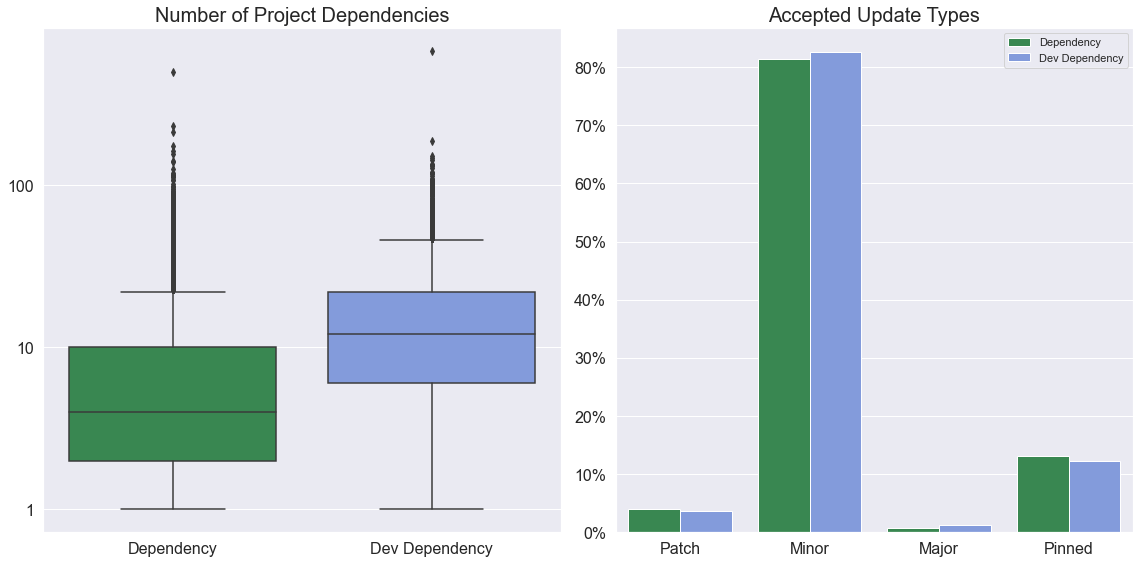

In [17]:
grouped_deps = dependencies_df.groupby(by=['package', 'deps_type'])['deps_name'].count().reset_index(name='count')

sns.set()
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
deps_type_order = ['Dependency', 'Dev Dependency']

params_1 = dict(
    data=grouped_deps,
    x='deps_type',
    y='count',
    order=deps_type_order,
)
ax_1 = sns.boxplot(
    **params_1,
    palette=TWO_COLOUR_PALETTE,
    ax=ax_1
)

ax_1.set_yscale("log")
ax_1.set_title(f'Number of Project Dependencies', fontsize=20)
ax_1.set_ylabel('', fontsize=20)
ax_1.set_xlabel('', fontsize=20)
y_labels = [f"{int(x)}" for x in ax_1.get_yticks()]
ax_1.set_yticklabels(y_labels, fontsize=16)
ax_1.set_xticklabels(ax_1.get_xticklabels(), fontsize=16)

params_2 = dict(
    data=ratios,
    x='accpected_update_type',
    y='ratio',
    hue='deps_type',
    order=['Patch', 'Minor', 'Major', 'Pinned'],
    hue_order=deps_type_order,
)
ax_2 = sns.barplot(
    **params_2,
    palette=TWO_COLOUR_PALETTE,
    ax=ax_2,
)
ax_2.set_title(f'Accepted Update Types', fontsize=20)
ax_2.set_ylabel('', fontsize=20)
ax_2.set_xlabel('', fontsize=20)
y_labels = [f"{int(x*100)}%" for x in ax_2.get_yticks()]
ax_2.set_yticklabels(y_labels, fontsize=16)
ax_2.set_xticklabels(ax_2.get_xticklabels(), fontsize=16)
ax_2.legend(
    title="",
    fancybox=True
)
fig.tight_layout()
plt.show()

In [18]:
all_ratios_to_add_rq1 = pd.DataFrame({
    'value_type': 'Accepted Update Types',
    'update_type': all_ratios['accpected_update_type'],
    'value': all_ratios['ratio'],
})
rq1_for_plot_aug = rq1_for_plot.append(all_ratios_to_add_rq1, ignore_index=True)

<ipython-input-19-65c5e5f8b68d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, fontsize=16)


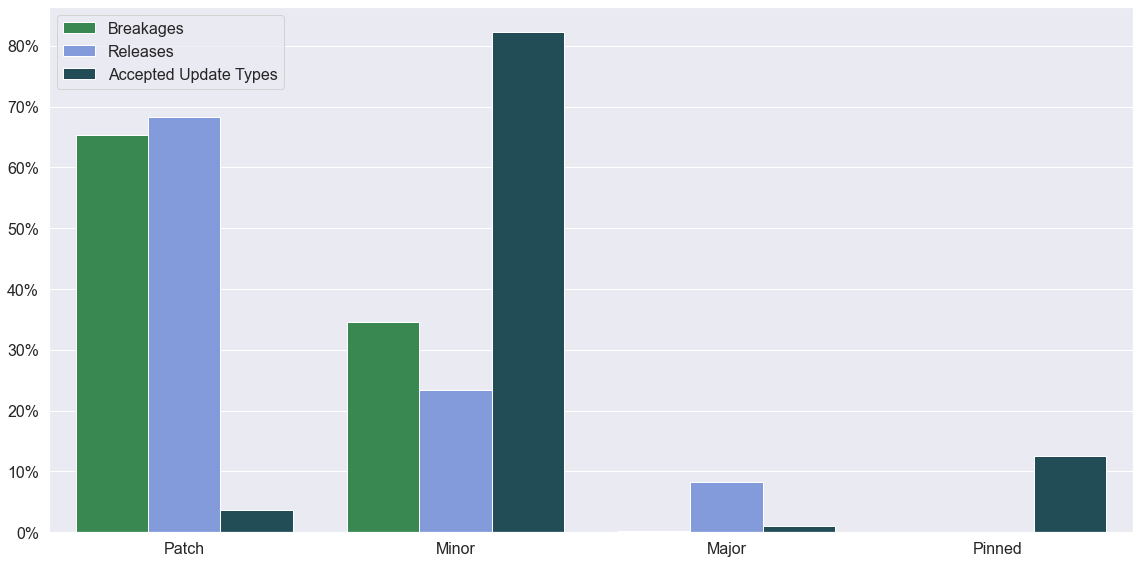

In [19]:

sns.set()
fig, ax = plt.subplots(figsize=(16, 8))

hue_order = [
    'Breakages',
    'Releases',
#     'Breakages/Releases',
    'Accepted Update Types'
]

params = dict(
    data=rq1_for_plot_aug[rq1_for_plot_aug['value_type'] != 'Breakages/Releases'],
    x="update_type",
    y='value',
    hue='value_type',
    order=['Patch', 'Minor', 'Major', 'Pinned'],
    hue_order=hue_order,
)
ax = sns.barplot(
    **params,
    palette=FOUR_COLOUR_PALETTE,
)

ax.set_title(f'', fontsize=20)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)

y_labels = [f"{int(y*100)}%" for y in ax.get_yticks()]
ax.set_yticklabels(y_labels, fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)

# Make legend bigger
ax.legend(
    title="",
    fancybox=True,
    fontsize=16,
)
fig.tight_layout()
plt.show()



In [20]:
for_stacked = \
    rq1_for_plot_aug[rq1_for_plot_aug['value_type'].isin(['Breakages', 'Releases', 'Accepted Update Types'])].copy()
for_stacked['per'] = for_stacked['value'] * 100
major_bars = list(for_stacked[for_stacked['update_type'] == 'Major']['per'].to_numpy())
minor_bars = list(for_stacked[for_stacked['update_type'] == 'Minor']['per'].to_numpy())
patch_bars = list(for_stacked[for_stacked['update_type'] == 'Patch']['per'].to_numpy())
pinned_bars = [0, 0] + list(for_stacked[for_stacked['update_type'] == 'Pinned']['per'].to_numpy())

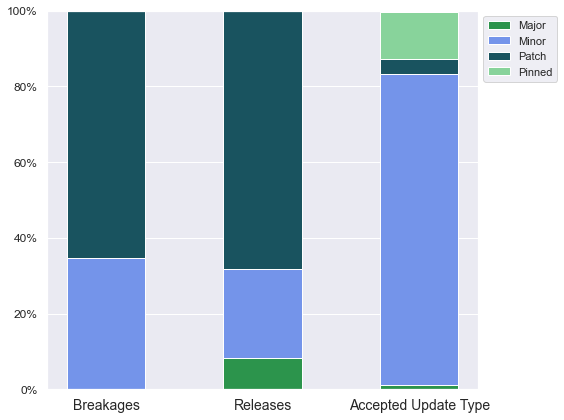

In [21]:
# Data
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
r = [0, 1, 2]
# plot
barWidth = 0.5
names = ('Breakages','Releases','Accepted Update Type')
# Create Major Bars
ax = plt.bar(
    r,
    major_bars,
    color=FOUR_COLOUR_PALETTE[0],
    edgecolor='white',
    width=barWidth,
    label="Major",
)
# Create Minor Bars
ax = plt.bar(
    r,
    minor_bars,
    bottom=major_bars,
    color=FOUR_COLOUR_PALETTE[1],
    edgecolor='white',
    width=barWidth,
    label="Minor",
)
# Create Patch Bars
ax = plt.bar(
    r,
    patch_bars,
    bottom=[i+j for i,j in zip(major_bars, minor_bars)],
    color=FOUR_COLOUR_PALETTE[2],
    edgecolor='white',
    width=barWidth,
    label="Patch",
)
ax = plt.bar(
    r,
    pinned_bars,
    bottom=[i+j+k for i,j,k in zip(major_bars, minor_bars, patch_bars)],
    color=FOUR_COLOUR_PALETTE[3],
    edgecolor='white',
    width=barWidth,
    label="Pinned",
)
# Custom x axis
plt.xticks(r, names, fontsize=14)
plt.xlabel("")
locs, labels = plt.yticks()
plt.yticks(locs, [f"{int(y)}%" for y in locs], fontsize=12)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# Show graphic
fig.tight_layout()
plt.show()